In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [153]:
df = pd.read_csv('../data/processed/clean_kelowna_housing_data.csv')

In [154]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816
1264,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932
1265,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449
1266,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1268 non-null   object 
 1   price            1268 non-null   int64  
 2   address          1268 non-null   object 
 3   Type             1268 non-null   object 
 4   nbeds            1268 non-null   int64  
 5   nbath            1268 non-null   int64  
 6   laundry          1268 non-null   object 
 7   heating          1268 non-null   object 
 8   parking          1268 non-null   object 
 9   air_conditioner  1268 non-null   object 
 10  furnished        1268 non-null   object 
 11  animal_friendly  1268 non-null   object 
 12  Area             1268 non-null   int64  
 13  lat              1268 non-null   float64
 14  lng              1268 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 148.7+ KB


In [156]:
df.describe(include = [object]).T

,count,unique,top,freq
name,1268,271,1 bed 1 bath house,159
address,1268,491,"kelowna, bc",308
Type,1268,4,House,619
laundry,1268,4,in-unit laundry,711
heating,1268,6,central heating,430
parking,1268,4,parking available,383
air_conditioner,1268,3,central ac,513
furnished,1268,3,unfurnished,811
animal_friendly,1268,4,No pets,955


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1268.0,1938.470032,1250.182666,400.00000,1000.000000,1800.00000,2500.000000,12785.00000
nbeds,1268.0,1.967666,1.063001,1.00000,1.000000,2.00000,3.000000,7.00000
nbath,1268.0,1.454259,0.714241,0.00000,1.000000,1.00000,2.000000,6.00000
Area,1268.0,1074.700315,644.477633,80.00000,910.000000,1200.00000,1200.000000,7000.00000
lat,1268.0,49.887786,0.163525,49.29241,49.860003,49.88698,49.897778,50.38468
lng,1268.0,-119.472512,0.136360,-120.14867,-119.496910,-119.49661,-119.411090,-118.61706


In [158]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816
1264,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932
1265,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449
1266,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058


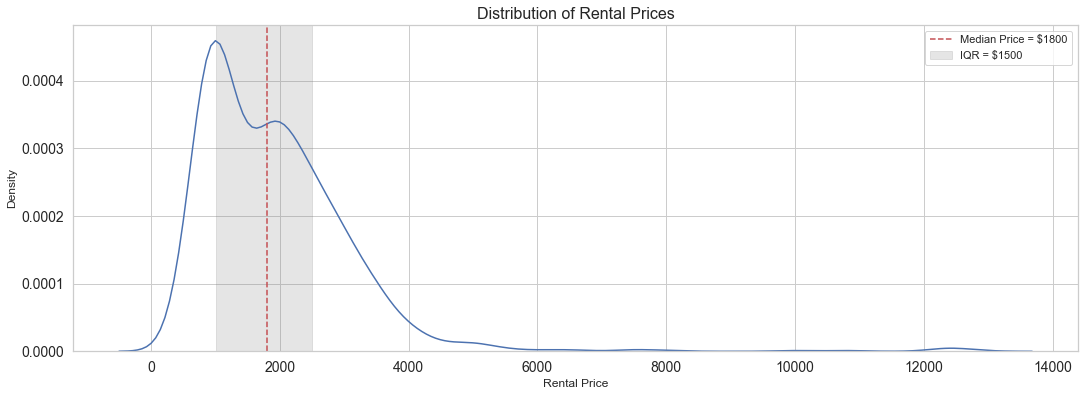

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Plot the kernel density estimate of the rental price distribution
ax = sns.kdeplot(data=df, x="price")

# Set axis labels and title
ax.set(xlabel='Rental Price', ylabel='Density', title='Distribution of Rental Prices')

# Increase font size of axis labels and title
ax.tick_params(axis='both', labelsize=14)
ax.set_title(ax.get_title(), fontsize=16)

# Adjust axis limits

# Add vertical line to show median rental price
median_price = df["price"].median()
ax.axvline(median_price, color='r', linestyle='--', label=f"Median Price = ${median_price:.0f}")

# Add shaded region to show interquartile range
q1, q3 = df["price"].quantile([0.25, 0.75])
iqr = q3 - q1
ax.axvspan(q1, q3, alpha=0.2, color='gray', label=f"IQR = ${iqr:.0f}")

# Add legend
ax.legend()

plt.show()


## What is the average rental price in the city?

In [160]:
df1 = df[['address', 'price', 'Type']]

In [161]:
df1['city'] = df1['address'].str.split(',').str[0]

/var/folders/15/r0q176ls4bs6m9xqgbmn_hdw0000gn/T/ipykernel_24639/3922821406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['city'] = df1['address'].str.split(',').str[0]


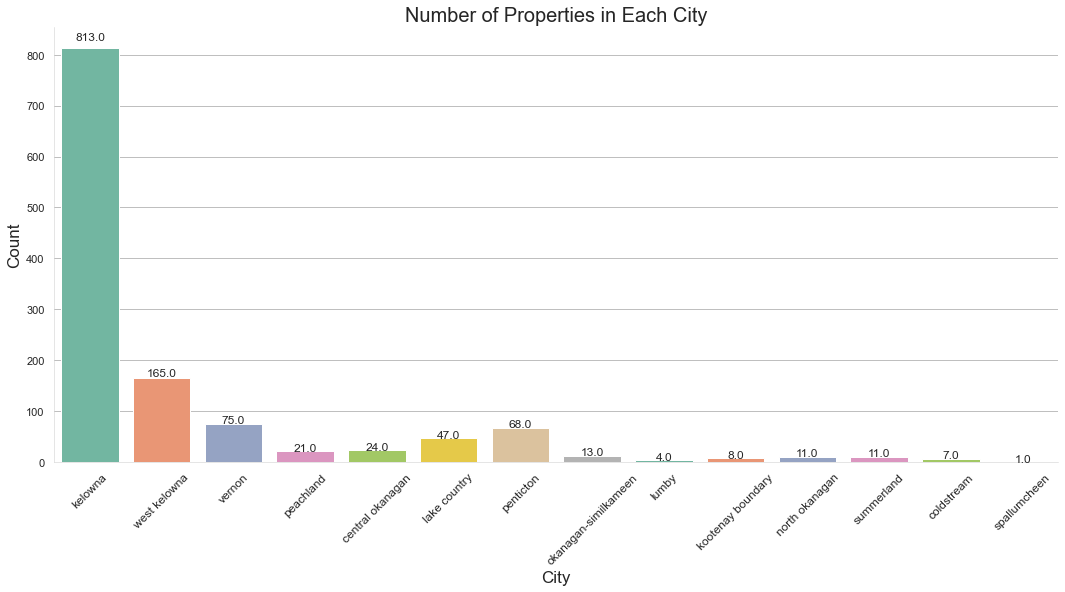

In [162]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df1, x='city', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Count', fontsize=17)
ax.set_title('Number of Properties in Each City', fontsize=20)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(rotation=45, fontsize=12)

# add count labels to the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontsize=12)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# adjust bottom and left spines
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# set grid lines
ax.grid(color='grey', linestyle='-', axis='y', alpha=0.5)

# display the plot
plt.show()

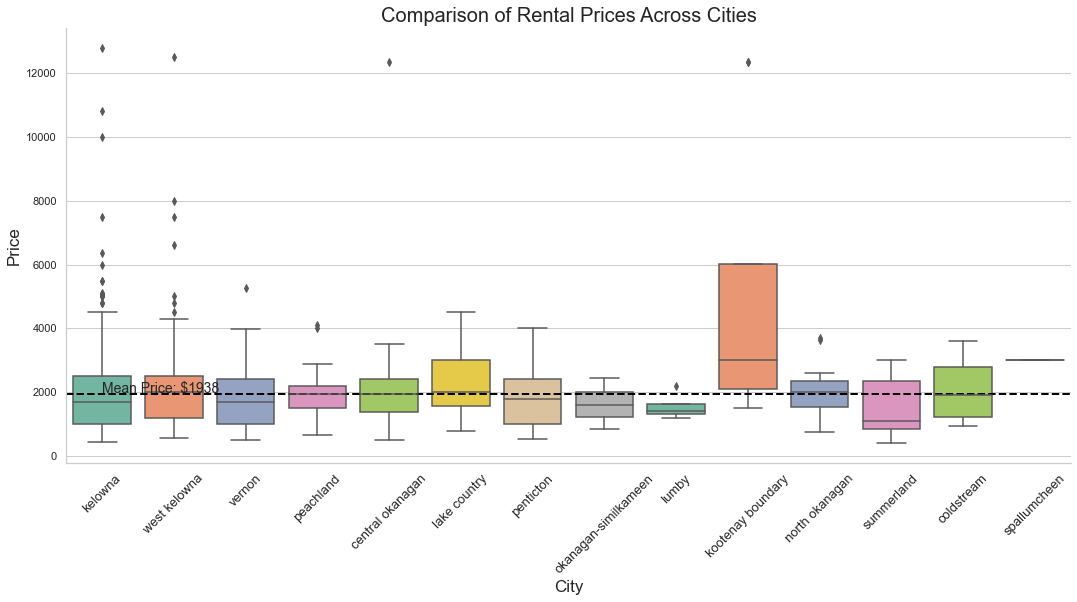

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df1, x='city', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df1['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
sns.despine()
plt.show()


## Which type of rental properties (e.g. apartment, townhouse, etc.) are most common in the dataset?


In [164]:
df2 = df[['price', 'Type', 'nbeds', 'nbath', 'Area', 'lat', 'lng']]

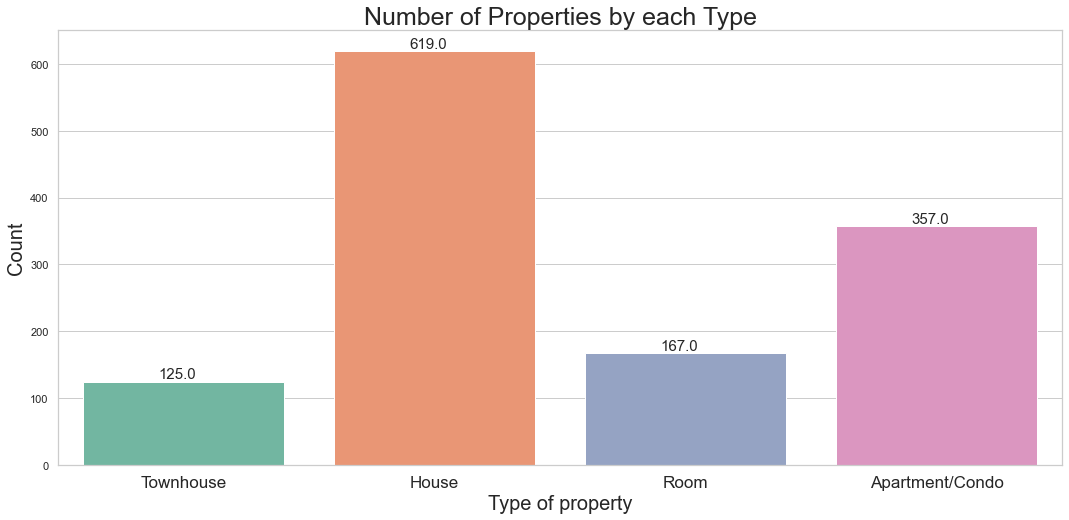

In [165]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df2, x='Type', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of property', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Number of Properties by each Type', fontsize=25)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(fontsize=17)

# add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5), fontsize=15)

# display the plot
plt.show()

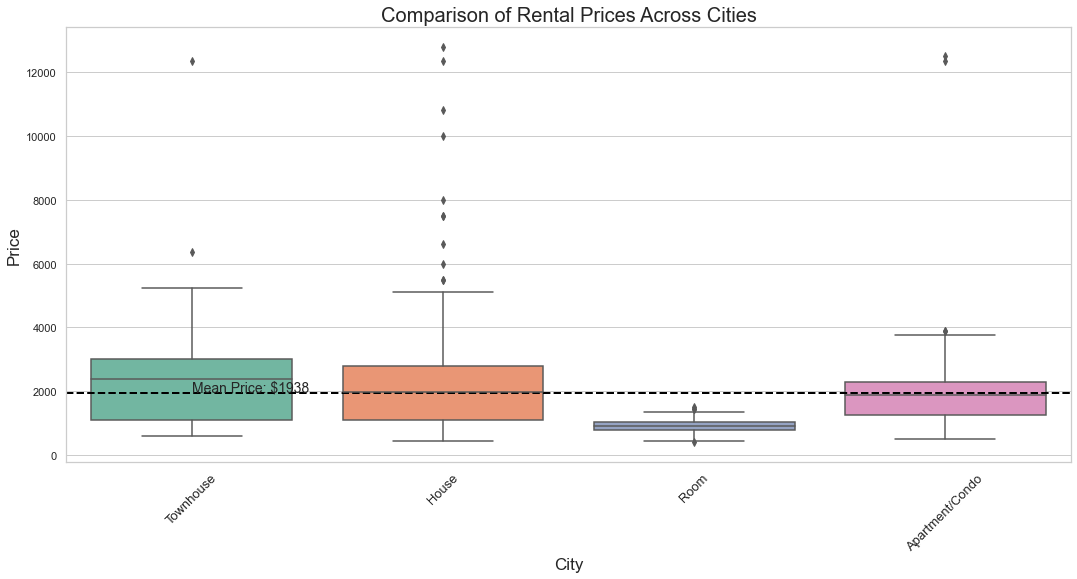

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df2, x='Type', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df2['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
plt.show()

In [167]:
df[df['Type'] == 'Room']

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367
27,private room for rent,1150,"kelowna, bc, v1v",Room,1,1,in-unit laundry,electric heating,garage parking,central ac,furnished,No pets,150,49.94804,-119.42824
32,room for rent,975,"kelowna, bc, v1v",Room,1,1,Not specified,Not specified,Not specified,Not specified,Not specified,No pets,150,49.94804,-119.42824
40,1 bedroom available in 2 bedroom basement suite,650,"west kelowna, bc",Room,1,1,in-unit laundry,central heating,street parking,Not specified,unfurnished,No pets,150,49.85902,-119.58413
48,private room for rent,750,"west kelowna, bc",Room,1,1,Not specified,central heating,parking available,central ac,furnished,cat friendly,150,49.85902,-119.58413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,private room for rent,800,"west kelowna, bc, v4t 2c3",Room,1,1,Not specified,Not specified,street parking,Not specified,unfurnished,No pets,150,49.83053,-119.61282
1243,private room for rent,950,"kelowna, bc, v1y 1k7",Room,1,1,in-unit laundry,electric heating,street parking,Not specified,furnished,No pets,150,49.87998,-119.49666
1258,private room for rent,750,"vernon, bc, v1t 5e1",Room,1,1,Not specified,central heating,street parking,central ac,unfurnished,No pets,150,50.26408,-119.27079
1259,private room for rent,1200,"kelowna, bc, v1v 2v4",Room,1,1,in-unit laundry,Not specified,Not specified,Not specified,furnished,No pets,150,49.90885,-119.44800


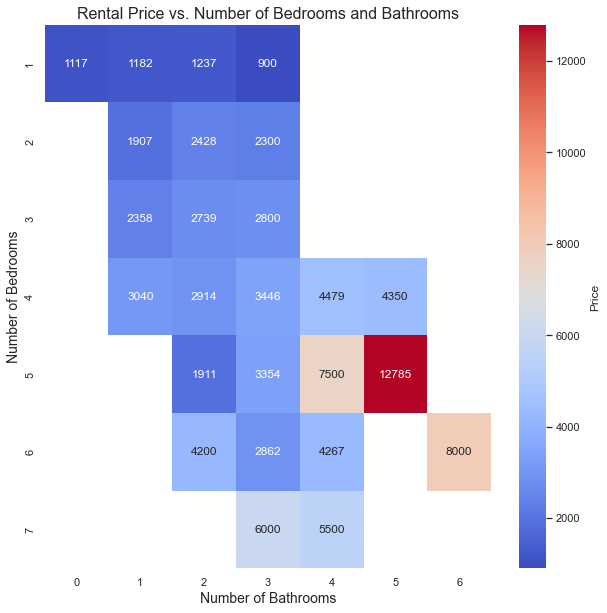

In [168]:
import seaborn as sns

# create a heat map of rental prices based on number of bedrooms and bathrooms
fig, ax = plt.subplots(figsize=(10, 10))
pivot_table = df2.pivot_table(index='nbeds', columns='nbath', values='price', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Price'})
ax.set_xlabel('Number of Bathrooms', fontsize=14)
ax.set_ylabel('Number of Bedrooms', fontsize=14)
ax.set_title('Rental Price vs. Number of Bedrooms and Bathrooms', fontsize=16)
plt.show()


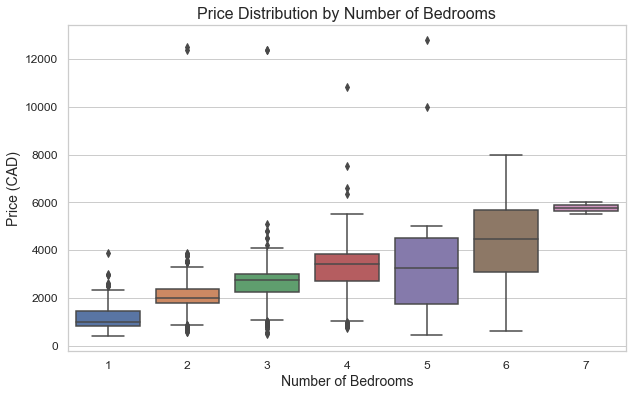

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)

# customize the tick labels and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

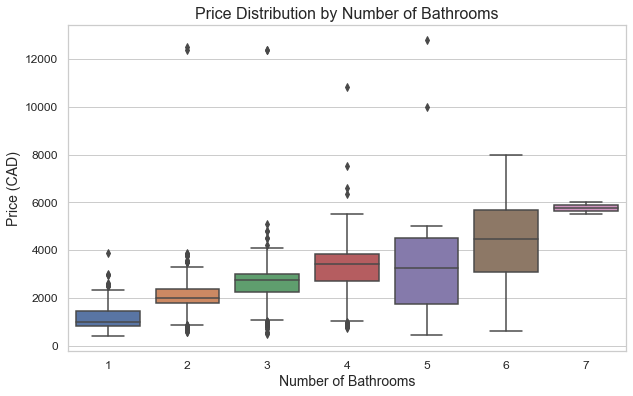

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bathrooms', fontsize=16)

# customize the tick labels and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

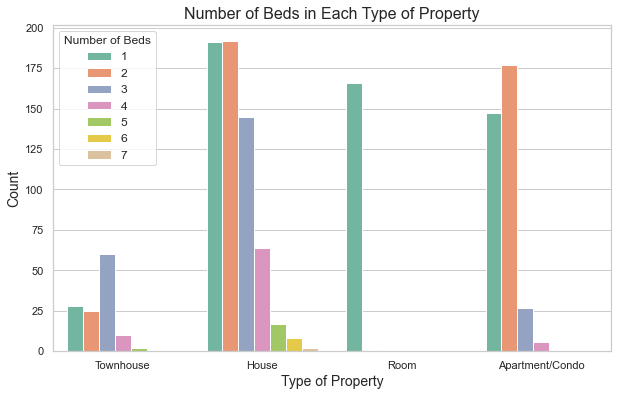

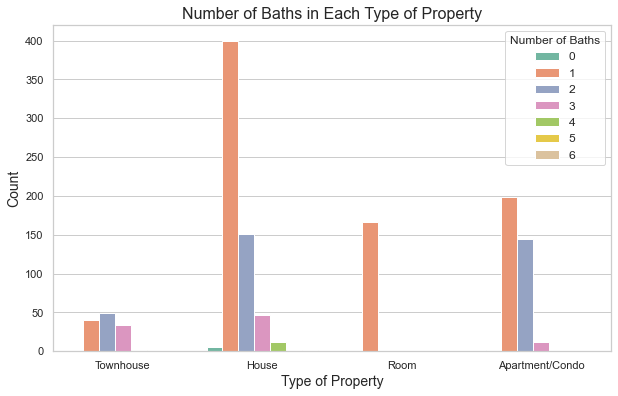

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a count plot of number of beds in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbeds', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Beds in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Beds', fontsize=12)

# display the plot
plt.show()

# create a count plot of number of baths in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbath', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Baths in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Baths', fontsize=12)

# display the plot
plt.show()

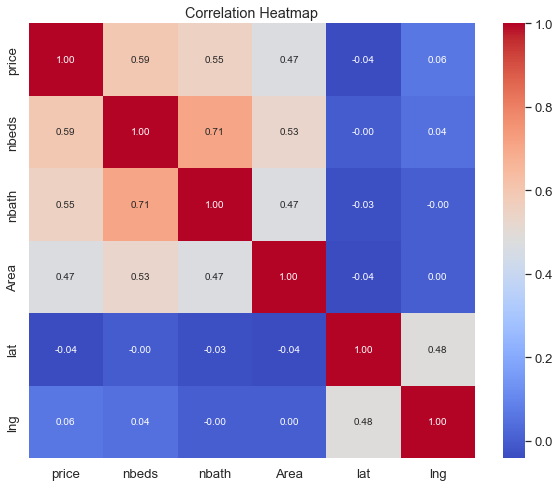

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

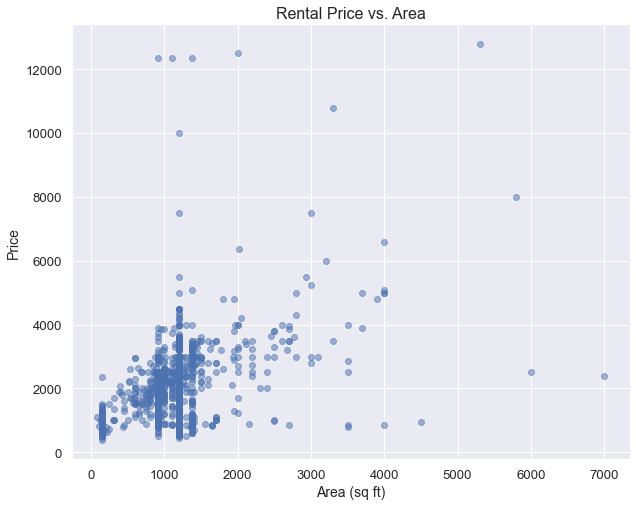

In [173]:
import matplotlib.pyplot as plt

# create a scatter plot of rental price vs. area
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df2['Area'], df2['price'], alpha=0.5)
ax.set_xlabel('Area (sq ft)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Rental Price vs. Area', fontsize=16)
plt.show()

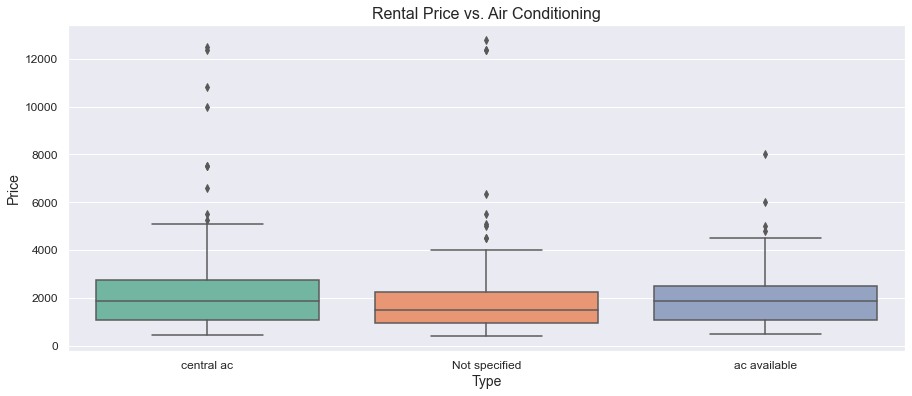

In [174]:
import seaborn as sns

# create a box plot of rental price vs. air conditioning
plt.figure(figsize=(15, 6))
sns.boxplot(x="air_conditioner", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Air Conditioning', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

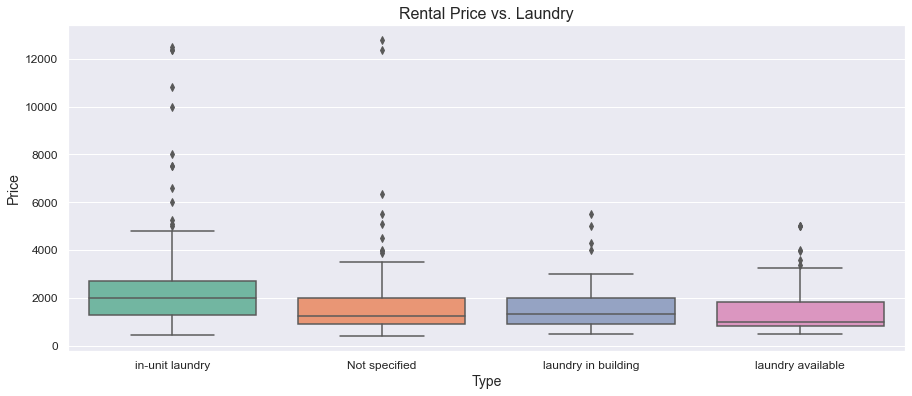

In [175]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x="laundry", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Laundry', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

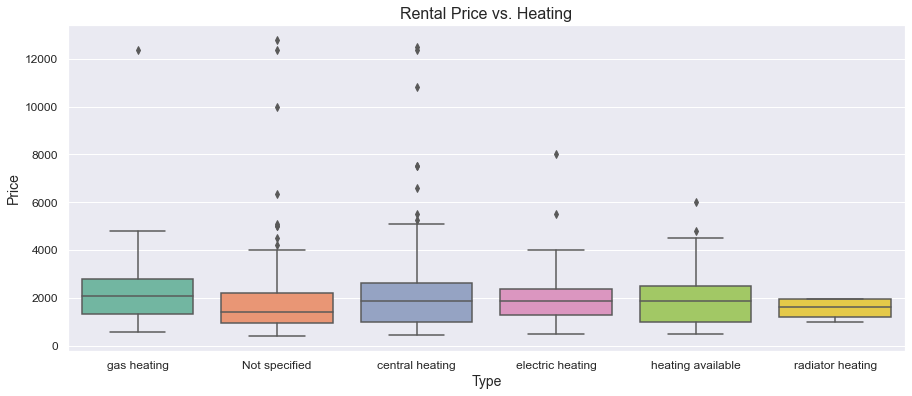

In [176]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="heating", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Heating', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [177]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816
1264,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932
1265,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449
1266,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058


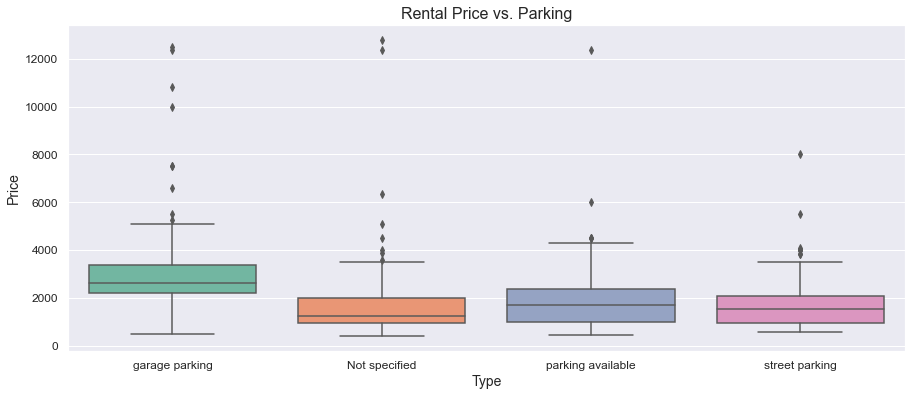

In [178]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="parking", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Parking', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

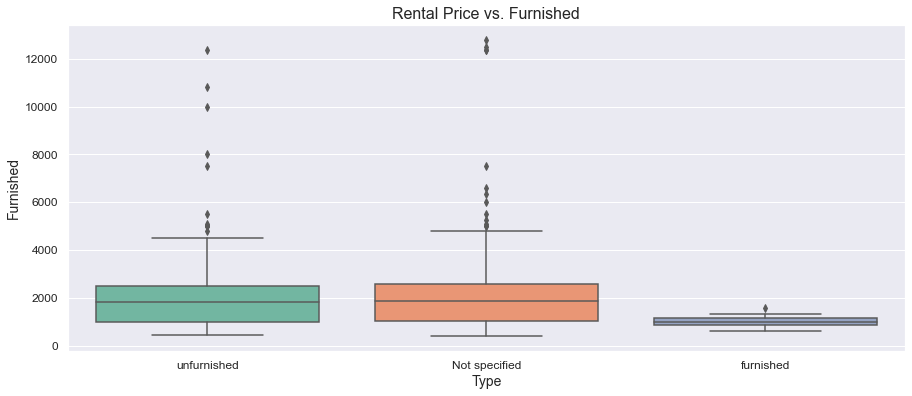

In [179]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="furnished", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Furnished', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

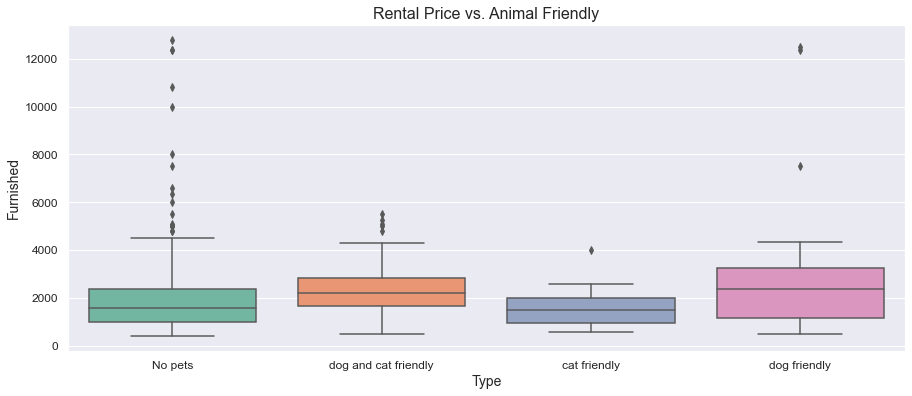

In [180]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="animal_friendly", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Animal Friendly', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [181]:
# Calculate average rental price by location
avg_price_by_location = df.groupby(['lat', 'lng']).agg({'price': 'mean'}).reset_index()

# Create map centered on the mean latitude and longitude
m = folium.Map(location=[avg_price_by_location['lat'].mean(), avg_price_by_location['lng'].mean()], zoom_start=12)

# Add marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for i, row in avg_price_by_location.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"${row['price']:.2f}",
        icon=folium.Icon(color='blue', icon='home'),
    ).add_to(marker_cluster)

# Display the map
m

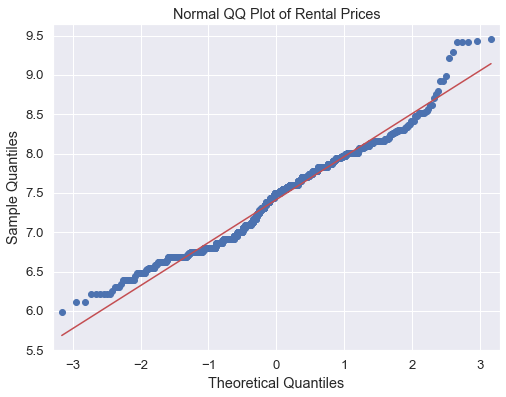

In [182]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Extract rental prices
rental_prices = np.log(df['price'])

# Create normal QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(rental_prices, line='s', ax=ax)
ax.set_title('Normal QQ Plot of Rental Prices')
plt.show()
